In [40]:
import json
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import ast
import cv2

video = "source_material/streetVideos/seattle1.mp4"
cap = cv2.VideoCapture(video)

if (cap.isOpened()== False): 
  raise Exception("Error opening video stream or file")

fps = int(cap.get(cv2.CAP_PROP_FPS))

bbDists = load("results/bbox_distances/iou/bbox_distances1")
bbDists = ast.literal_eval(bbDists)
data = load("results/velocities/iou/velocities1")
spotVelocities = load("results/spot_velocities/iou/spot_velocities1")

all_lengths = list(map(lambda arr: len(arr), data))
videoDir = "results/plots_tables/iou/video1"
os.mkdir(videoDir)

FileExistsError: [Errno 17] File exists: 'results/plots_tables/iou/video1'

Number of registered objects: 365
Mean number of samples per object: 2.873972602739726
Median number of samples per object: 1.0
STD of samples per object: 5.7581872004013395



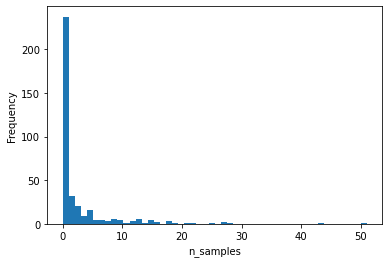

In [66]:
print(f"Number of registered objects: {len(all_lengths)}")
print(f"Mean number of samples per object: {np.mean(all_lengths)}")
print(f"Median number of samples per object: {np.median(all_lengths)}")
print(f"STD of samples per object: {np.std(all_lengths)}")
print()

_ = plt.hist(all_lengths, bins=50)
_ = plt.xlabel("n_samples")
_ = plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/samplesPerObject.jpg")

Number of registered speeds: 1049
Mean velocity: 17.323781939214815
Median velocity: 13.081933532461905
velocity STD: 15.59000845579981
portion of samples with speed > 70: 0.0
portion of samples with speed > 100: 0.0



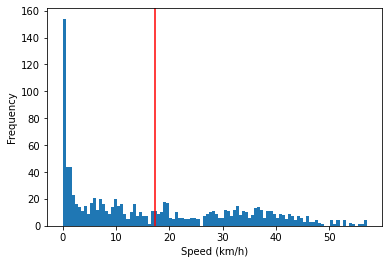

In [62]:
all_samples_concat = np.hstack(list(data))
print(f"Number of registered speeds: {len(all_samples_concat)}")
print(f"Mean velocity: {np.mean(all_samples_concat)}")
print(f"Median velocity: {np.median(all_samples_concat)}")
print(f"velocity STD: {np.std(all_samples_concat)}")
print(f"portion of samples with speed > 70: {len(all_samples_concat[all_samples_concat > 70])/len(all_samples_concat)}")
print(f"portion of samples with speed > 100: {len(all_samples_concat[all_samples_concat > 100])/len(all_samples_concat)}")
print()

_ = plt.hist(all_samples_concat, bins=100, density=False)
_ = plt.axvline(x=np.mean(all_samples_concat), color='red')
plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/SpeedDistribution.jpg")
plt.show()

In [43]:
sorted_samples = sorted(data, reverse=True, key=lambda arr: len(arr))[:10]
sorted_lens = list(map(lambda arr: len(arr), sorted_samples))
median_lens, std_lens = np.median(sorted_lens), np.std(sorted_lens)

inds = [list(map(lambda t: t*25/fps,range(len(sorted_sample)))) for sorted_sample in sorted_samples]

sorted_bbs = sorted(bbDists, reverse=True, key=lambda arr: len(arr))[:10]
sorted_lens_bb = list(map(lambda arr: len(arr), sorted_bbs))
median_lens_bb, std_lens_bb = np.median(sorted_lens_bb), np.std(sorted_lens_bb)
inds_bbs = [range(len(sorted_bb)) for sorted_bb in sorted_bbs]

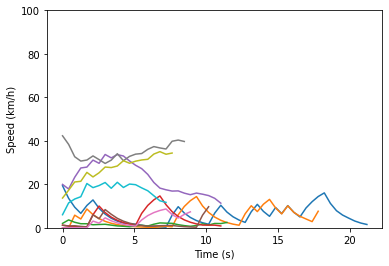

In [44]:
for i in range(len(inds)):
    _ = plt.plot(inds[i], sorted_samples[i], )
    _ = plt.ylim(0,100)
_ = plt.xlabel("Time (s)")
_ = plt.ylabel("Speed (km/h)")
plt.savefig(f"{videoDir}/SpeedTimeSeries.jpg")

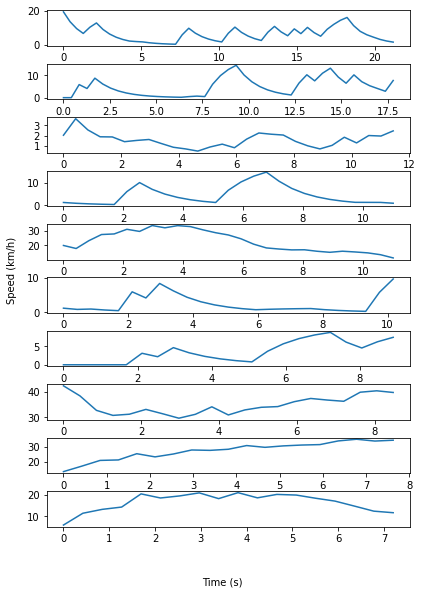

In [69]:
f, ax = plt.subplots(len(inds), 1, sharex=False, sharey=False)
for i in range(len(inds)):
    ax[i].plot(inds[i], sorted_samples[i])
f.text(0.5, 0.04, 'Time (s)', ha='center')
f.text(0.04, 0.5, 'Speed (km/h)', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.5)
f.set_size_inches(6.5, 9.5)
plt.savefig(f"{videoDir}/multiPlotTimeSeries.jpg")

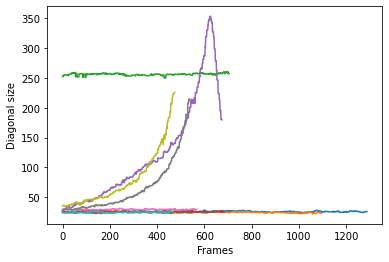

In [49]:
for i in range(len(inds)):
    _ = plt.plot(inds_bbs[i], sorted_bbs[i])

_ = plt.xlabel("Frames")
_ = plt.ylabel("Diagonal size")
plt.savefig(f"{videoDir}/bbDistTimeSeries.jpg")

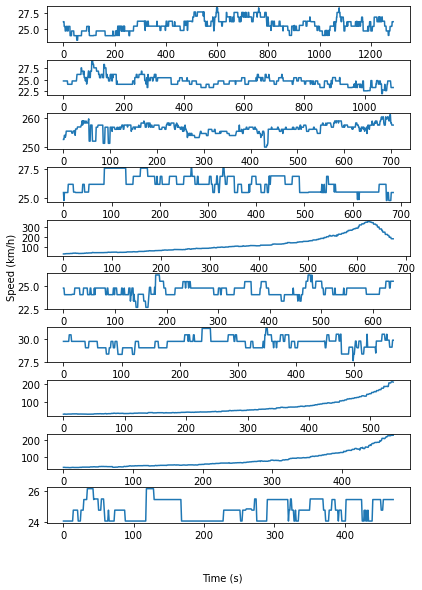

In [71]:
f, ax = plt.subplots(len(inds_bbs), 1, sharex=False, sharey=False)
for i in range(len(inds_bbs)):
    ax[i].plot(inds_bbs[i], sorted_bbs[i])
f.text(0.5, 0.04, 'Time (s)', ha='center')
f.text(0.04, 0.5, 'Speed (km/h)', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.5)
f.set_size_inches(6.5, 9.5)
plt.savefig(f"{videoDir}/multiPlotBBsTimeSeries.jpg")

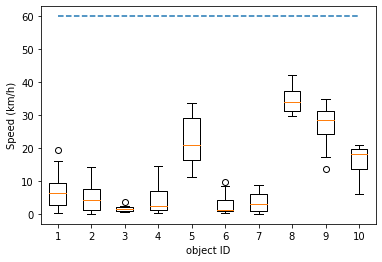

In [59]:
fig, ax = plt.subplots()
_ = ax.boxplot(np.array(sorted_samples, dtype=object))
_ = plt.plot(range(1,11), [60]*10, '--')
_ = ax.set_xlabel("object ID")
_ = ax.set_ylabel("Speed (km/h)")
plt.savefig(f"{videoDir}/speedBoxPlots.jpg")

Number of registered objects: 46
Mean velocity: 37.38394874378664
Median velocity: 38.910967613879926
STD of velocities: 8.79698890154624



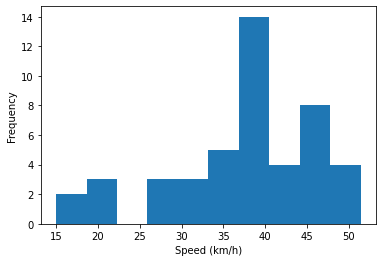

In [54]:
print(f"Number of registered objects: {len(spotVelocities)}")
print(f"Mean velocity: {np.mean(spotVelocities)}")
print(f"Median velocity: {np.median(spotVelocities)}")
print(f"STD of velocities: {np.std(spotVelocities)}")
print()

_ = plt.hist(spotVelocities, bins=10)
_ = plt.xlabel("Speed (km/h)")
_ = plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/SpeedLineDistribution.jpg")